In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from graph_reinforcement_learning_using_blockchain_data import config

config.load_dotenv()

True

In [2]:
df_features = pd.read_csv(config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features.csv")

In [3]:
df = df_features.drop(columns=["transactionHash", "from", "to", "blockNumber"])
df.head()

,gasUsed,cumulativeGasUsed,transactionIndex,effectiveGasPrice,status,fee,num_logs,dummy_0x1c411e9a,dummy_0x9d9af8e3,dummy_0xddac4093,...,dummy_0x17307eab,dummy_0x8201aa3f,dummy_0x19b47279,dummy_0x8c5be1e5,dummy_0xe9149e1b,dummy_0xddf252ad,dummy_0x908fb5ee,dummy_0x7fcf532c,dummy_0xd78ad95f,label
0,153529,10750253,111,19150328915,1,2940130847991035,3,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,123497,229900,1,139502435999,1,17228132338568503,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,21000,15838026,183,22098066562,1,464059397802000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46817,14885776,165,18825121161,1,881335697394537,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,32215,3160909,48,19660583885,1,633365709855275,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df = df_features.drop(columns=["transactionHash", "from", "to", "blockNumber"])

X_viz = df.drop(columns=["label"])
y_viz = df["label"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_viz)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

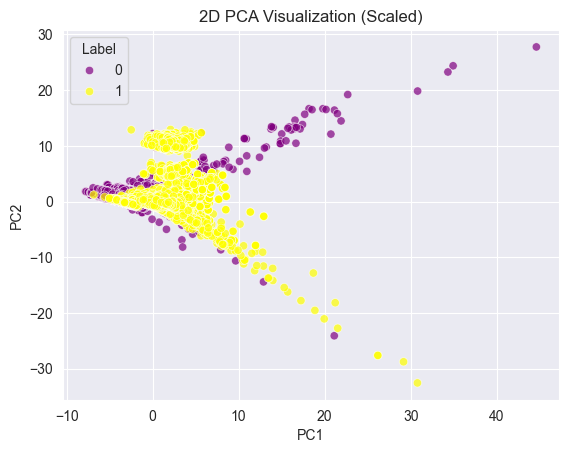

In [12]:
df_plot = pd.DataFrame({"PC1": components[:, 0], "PC2": components[:, 1], "Label": y_viz})

sns.scatterplot(
    data=df_plot, x="PC1", y="PC2", hue="Label", palette=["purple", "yellow"], alpha=0.7
)
plt.title("2D PCA Visualization (Scaled)")
plt.show()